Next we take a look at the INPUTEVENTS_CV table.

Let's start by importing the libraries that we will need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [2]:
inputevents_cv_df = pd.read_csv('../Extracted CSVs/INPUTEVENTS_CV.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,9,17,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Getting a feel of the data.

In [3]:
inputevents_cv_df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'CHARTTIME', 'ITEMID',
       'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID',
       'ORDERID', 'LINKORDERID', 'STOPPED', 'NEWBOTTLE', 'ORIGINALAMOUNT',
       'ORIGINALAMOUNTUOM', 'ORIGINALROUTE', 'ORIGINALRATE', 'ORIGINALRATEUOM',
       'ORIGINALSITE'],
      dtype='object')

In [4]:
inputevents_cv_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,ORDERID,LINKORDERID,STOPPED,NEWBOTTLE,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE
0,592,24457,184834.0,205776.0,2193-09-11 09:00:00,30056,100.0,ml,NaN,NaN,...,756654,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
1,593,24457,184834.0,205776.0,2193-09-11 12:00:00,30056,200.0,ml,NaN,NaN,...,3564075,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
2,594,24457,184834.0,205776.0,2193-09-11 16:00:00,30056,160.0,ml,NaN,NaN,...,422646,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
3,595,24457,184834.0,205776.0,2193-09-11 19:00:00,30056,240.0,ml,NaN,NaN,...,5137889,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
4,596,24457,184834.0,205776.0,2193-09-11 21:00:00,30056,50.0,ml,NaN,NaN,...,8343792,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN


In [5]:
inputevents_cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17527935 entries, 0 to 17527934
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ROW_ID             int64  
 1   SUBJECT_ID         int64  
 2   HADM_ID            float64
 3   ICUSTAY_ID         float64
 4   CHARTTIME          object 
 5   ITEMID             int64  
 6   AMOUNT             float64
 7   AMOUNTUOM          object 
 8   RATE               float64
 9   RATEUOM            object 
 10  STORETIME          object 
 11  CGID               float64
 12  ORDERID            int64  
 13  LINKORDERID        int64  
 14  STOPPED            object 
 15  NEWBOTTLE          float64
 16  ORIGINALAMOUNT     float64
 17  ORIGINALAMOUNTUOM  object 
 18  ORIGINALROUTE      object 
 19  ORIGINALRATE       float64
 20  ORIGINALRATEUOM    object 
 21  ORIGINALSITE       object 
dtypes: float64(8), int64(5), object(9)
memory usage: 2.9+ GB


The next line of code tells us how many times a patient receieved a new bottle of input item.

In [10]:
inputevents_cv_df[inputevents_cv_df['NEWBOTTLE'].notnull()].count()['ROW_ID']

245899

In [12]:
inputevents_cv_df[inputevents_cv_df['NEWBOTTLE'].notnull()]['SUBJECT_ID']

168         19246
1128         2187
2530         4371
2661        26176
3287        17357
            ...  
14053318    31056
14053319    31056
14053320    31056
14061727    27382
14061741    31263
Name: SUBJECT_ID, Length: 245899, dtype: int64

In [13]:
inputevents_cv_df['ORIGINALROUTE'].value_counts()

Intravenous Push        9215677
IV Drip                 4131467
Intravenous             1252093
Gastric/Feeding Tube    1066706
Nasogastric              725631
Intravenous Infusion     480507
By Mouth                 312249
Oral                     188113
Drip                      40709
GU                         5408
IV Piggyback               1413
Oral or Nasogastric        1279
Name: ORIGINALROUTE, dtype: int64

This is how the input item/solution was administered to the patients.

<AxesSubplot:>

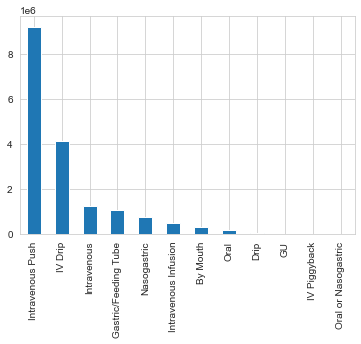

In [14]:
inputevents_cv_df['ORIGINALROUTE'].value_counts().plot(kind='bar')

In [15]:
inputevents_cv_df['ORIGINALSITE'].value_counts()

PO / NG                 26917
Right Int. Jugular      25420
Right Arm               21529
UVC                     17895
Left Arm                17321
Left Subclavian         14674
Right Subclavian        12182
Percutaneous Cath       12075
Left Int. Jugular        5995
Right Hand               4825
UAC                      4589
Right Femoral            4338
Left Hand                2614
Left Femoral             1632
Umb Venous Primary       1594
Umb Venous Secondary     1172
Left Foot                 987
Right Foot                542
Right Leg                 521
Peripheral Arterial       329
Scalp                     251
Left Leg                  170
Name: ORIGINALSITE, dtype: int64

This is the original site of administration.

<AxesSubplot:>

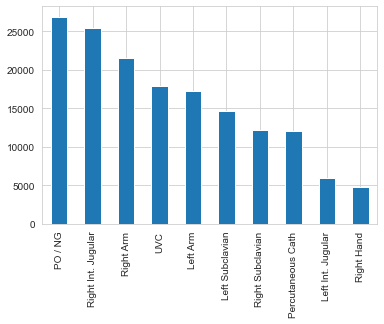

In [16]:
inputevents_cv_df['ORIGINALSITE'].value_counts().head(10).plot(kind='bar')

Next we take a look at the INPUTEVENTS_MV Table. The difference between the tables is the system used to monitor inputs. CV corresponds to Philips CareVue and MV corresponds to iMDSoft Metavision.

In [17]:
inputevents_mv_df = pd.read_csv('../Extracted CSVs/INPUTEVENTS_MV.csv')

Let's get a feel of the data.

In [18]:
inputevents_mv_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,...,TOTALAMOUNTUOM,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE,ORIGINALAMOUNT,ORIGINALRATE
0,241,27063,139787,223259.0,2133-02-05 06:29:00,2133-02-05 08:45:00,225166,6.774532,mEq,NaN,...,ml,0,0,1,Rewritten,NaN,RN,2133-02-05 12:52:00,10.000000,0.050000
1,242,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225944,28.132997,ml,30.142497,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,28.132998,30.255817
2,243,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225166,2.813300,mEq,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,2.813300,0.050426
3,244,27063,139787,223259.0,2133-02-03 12:00:00,2133-02-03 12:01:00,225893,1.000000,dose,NaN,...,ml,0,0,2,Rewritten,RN,NaN,2133-02-03 17:06:00,1.000000,1.000000
4,245,27063,139787,223259.0,2133-02-03 12:00:00,2133-02-03 12:01:00,220949,100.000000,ml,NaN,...,ml,0,0,2,Rewritten,RN,NaN,2133-02-03 17:06:00,100.000000,0.000000


In [19]:
inputevents_mv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618991 entries, 0 to 3618990
Data columns (total 31 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   ROW_ID                         int64  
 1   SUBJECT_ID                     int64  
 2   HADM_ID                        int64  
 3   ICUSTAY_ID                     float64
 4   STARTTIME                      object 
 5   ENDTIME                        object 
 6   ITEMID                         int64  
 7   AMOUNT                         float64
 8   AMOUNTUOM                      object 
 9   RATE                           float64
 10  RATEUOM                        object 
 11  STORETIME                      object 
 12  CGID                           int64  
 13  ORDERID                        int64  
 14  LINKORDERID                    int64  
 15  ORDERCATEGORYNAME              object 
 16  SECONDARYORDERCATEGORYNAME     object 
 17  ORDERCOMPONENTTYPEDESCRIPTION  object 
 18  OR

In [20]:
inputevents_mv_df['ISOPENBAG'].map(lambda x: 'YES' if x==1 else 'NO').value_counts()

NO     3617385
YES       1606
Name: ISOPENBAG, dtype: int64

The above output tells us how many of the inputs were from an open bag.

<AxesSubplot:xlabel='PATIENTWEIGHT', ylabel='Count'>

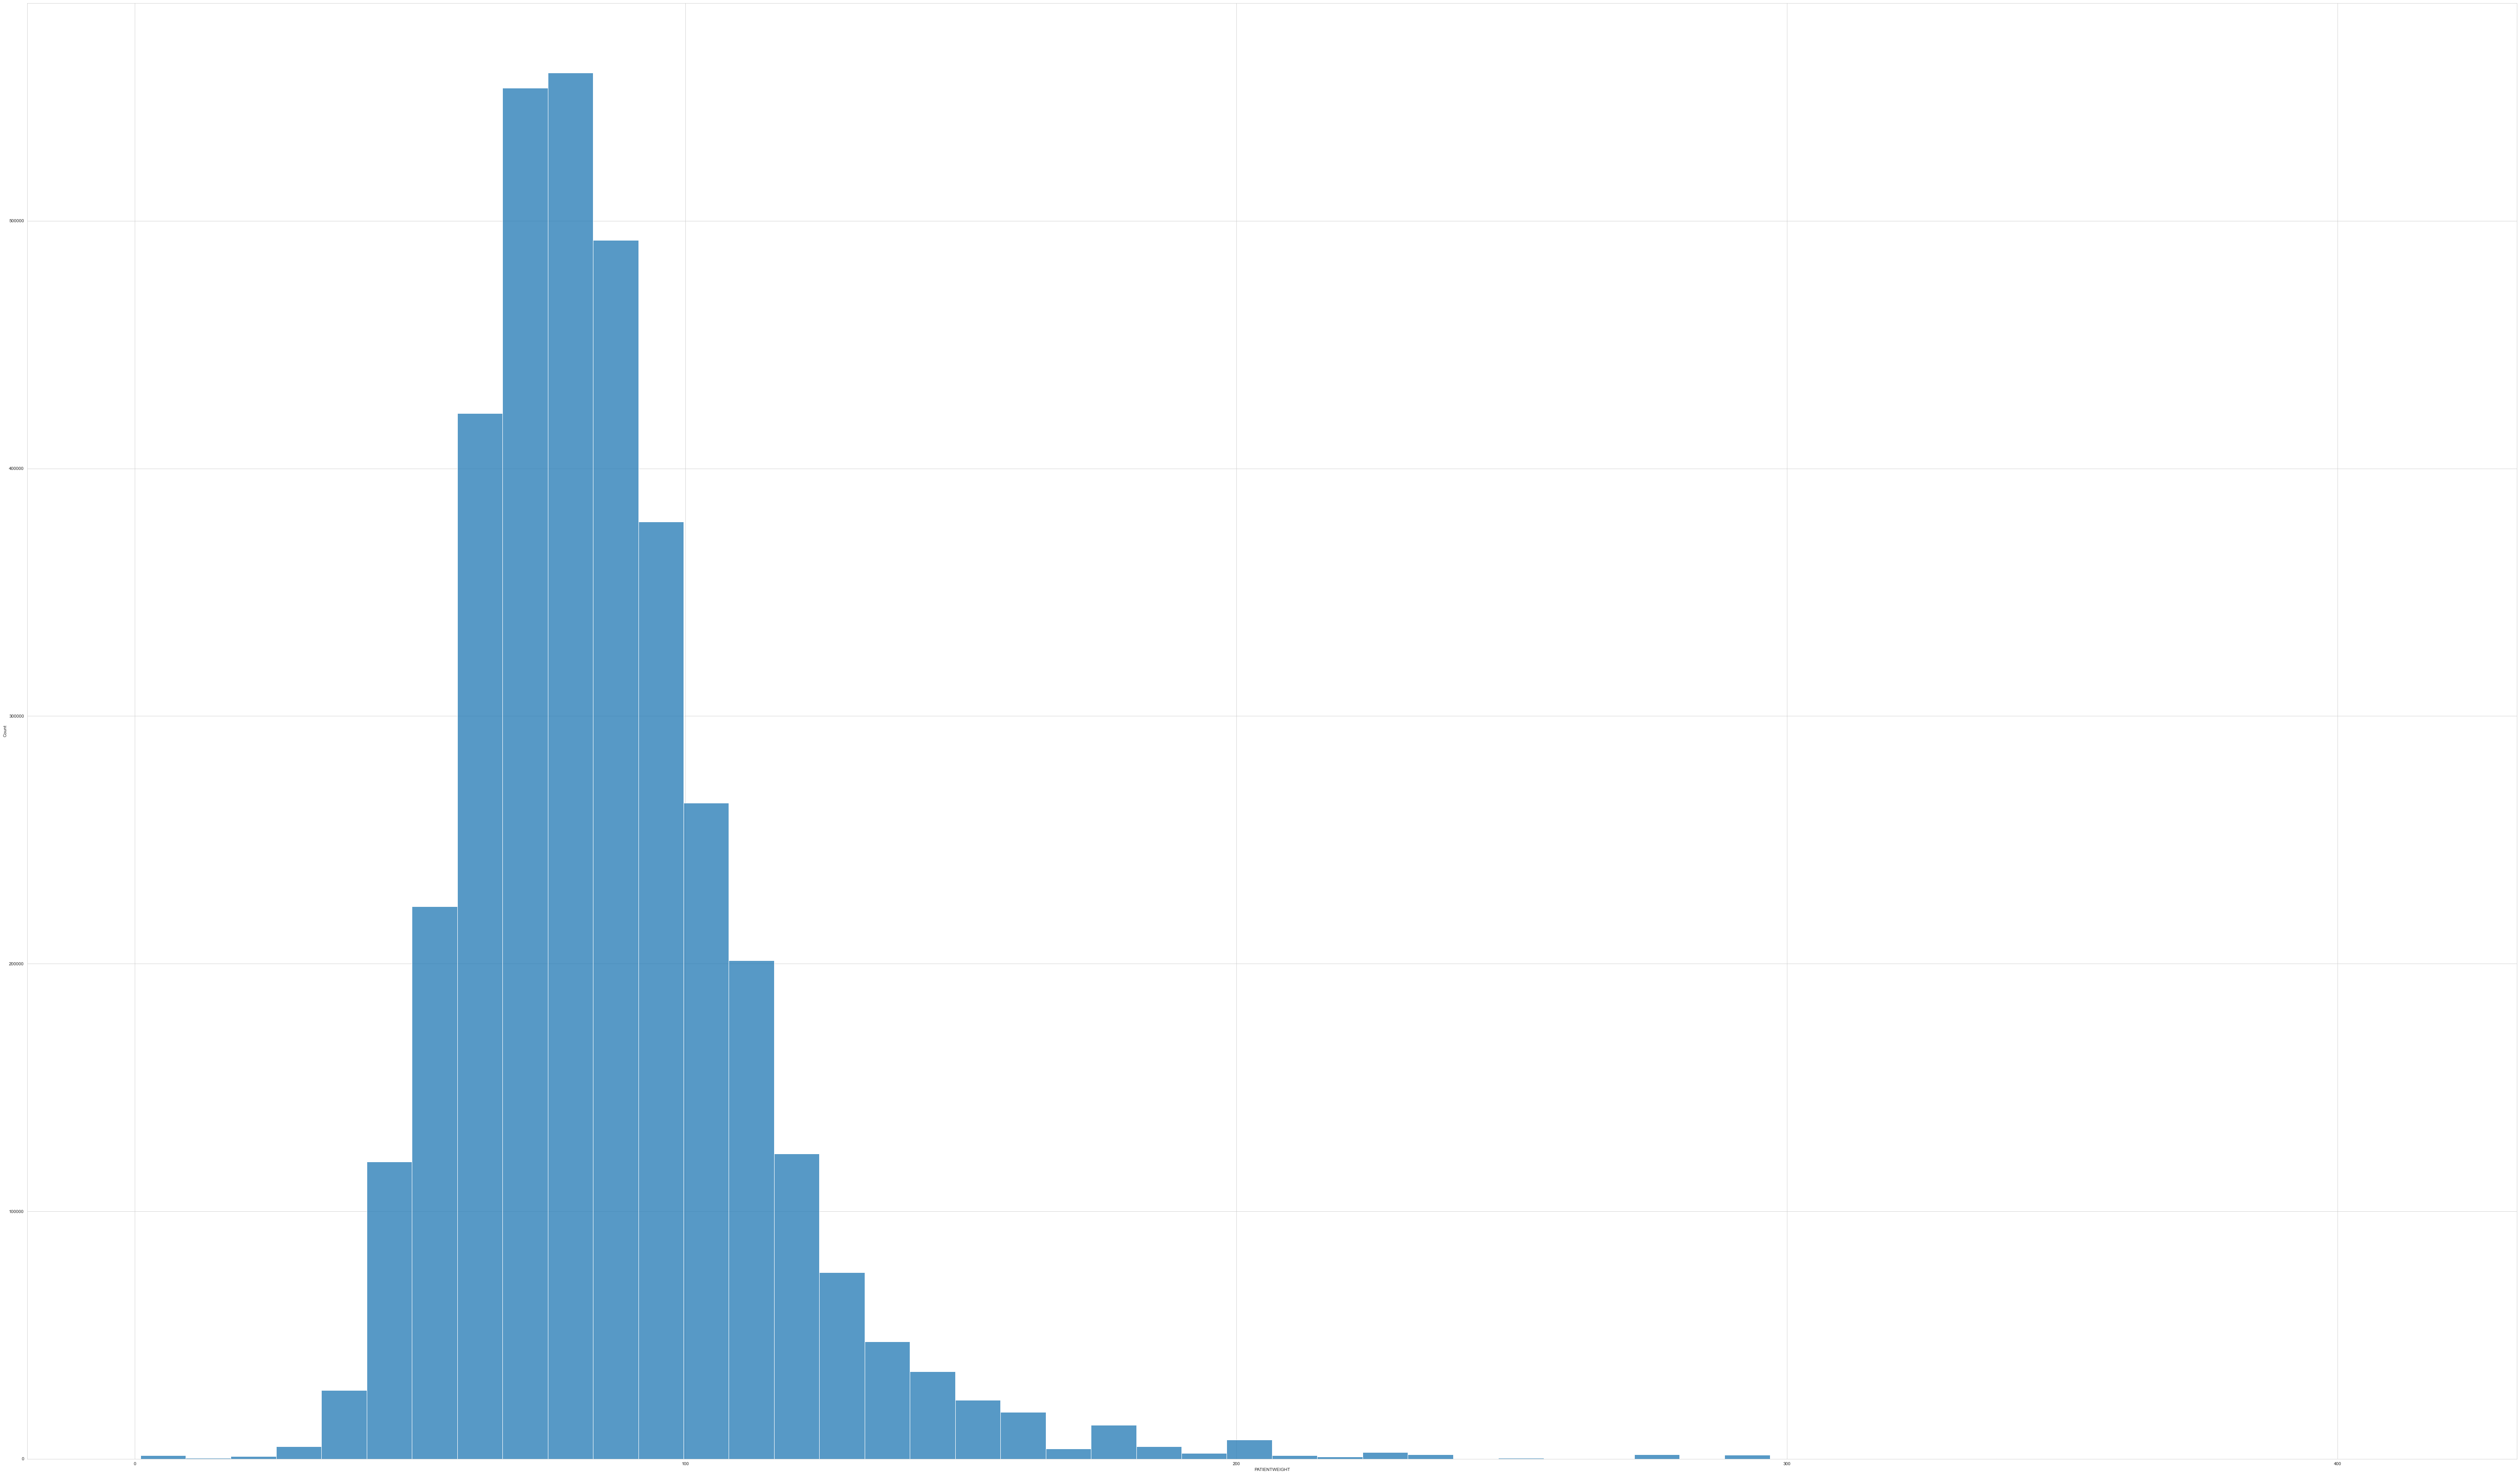

In [21]:
plt.figure(figsize=(100,60))
sns.histplot(data = inputevents_mv_df[inputevents_mv_df['PATIENTWEIGHT']<=500], x = 'PATIENTWEIGHT', bins=50)

The above plot is a distribution of the weights of the patients admitted.
Let's find out how many of the inputs/solutions were continued even after a transfer took place, if one took place.

In [22]:
inputevents_mv_df['CONTINUEINNEXTDEPT'].map(lambda x: 'YES' if x==1 else 'NO').value_counts()

NO     3618906
YES         85
Name: CONTINUEINNEXTDEPT, dtype: int64

If the input orders were cancelled, why were they cancelled?

In [23]:
inputevents_mv_df['CANCELREASON'].value_counts()

0    3250366
2     249261
1     119364
Name: CANCELREASON, dtype: int64

In [24]:
inputevents_mv_df['STATUSDESCRIPTION'].value_counts()

FinishedRunning    2002471
Rewritten           695521
Changed             667547
Stopped             157735
Paused               94820
Flushed                897
Name: STATUSDESCRIPTION, dtype: int64

STATUSDESCRIPTION states the ultimate status of the item, or more specifically, row. It is used to indicate why the delivery of the compound has ended. There are only six possible statuses:
<br>
Changed - The current delivery has ended as some aspect of it has changed (most frequently, the rate has been changed) <br>
Paused - The current delivery has been paused <br>
FinishedRunning - The delivery of the item has finished (most frequently, the bag containing the compound is empty) <br>
Stopped - The delivery of the item been terminated by the caregiver <br>
Rewritten - Incorrect information was input, and so the information in this row was rewritten (these rows are primarily useful for auditing purposes - the rates/amounts described were not delivered and so should not be used if determining what compounds a patient has received) <br>
Flushed - A line was flushed. <br>